## Importing requires libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Function to fetch the datasets

In [2]:
import opendatasets as od
import os
import shutil

def fetch_turbine_data(url, directory):
    if not os.path.isdir(directory):
        os.makedirs(directory)
    if not os.path.isfile(directory+'/Turbine_Data.csv'):
        od.download(url, data_dir=directory)
        shutil.move(directory +"/wind-power-forecasting/Turbine_Data.csv", 
                    directory+"/Turbine_Data.csv")
        os.rmdir(directory+"/wind-power-forecasting/")
    else:
        print("Dataset is already present")


DIR = './datasets'
URL = 'https://www.kaggle.com/theforcecoder/wind-power-forecasting'

fetch_turbine_data(URL,DIR)

Dataset is already present


## Loading the dataset

In [3]:
def load_turbine_data(path = DIR):
    return pd.read_csv(path + "/Turbine_Data.csv")
turbine_df = load_turbine_data()

In [4]:
turbine_df.tail()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
118219,2020-03-30 23:10:00+00:00,70.044465,27.523741,45.711129,1.515669,1.950088,1.950088,0.0,59.821165,55.193793,...,58.148777,39.008931,36.476562,178.0,13.775785,9.234004,2.0,G01,178.0,3.533445
118220,2020-03-30 23:20:00+00:00,40.833474,27.602882,45.598573,1.702809,2.136732,2.136732,0.0,59.142038,54.798545,...,57.550367,39.006759,36.328125,178.0,8.088928,9.229370,2.0,G01,178.0,3.261231
118221,2020-03-30 23:30:00+00:00,20.777790,27.560925,45.462045,1.706214,2.139664,2.139664,0.0,58.439439,54.380456,...,57.099335,39.003815,36.131944,178.0,4.355978,9.236802,2.0,G01,178.0,3.331839
118222,2020-03-30 23:40:00+00:00,62.091039,27.810472,45.343827,1.575352,2.009781,2.009781,0.0,58.205413,54.079014,...,56.847239,39.003815,36.007805,190.0,12.018077,9.237374,2.0,G01,190.0,3.284468
118223,2020-03-30 23:50:00+00:00,68.664425,27.915828,45.231610,1.499323,1.933124,1.933124,0.0,58.581716,54.080505,...,56.741040,39.003815,35.914062,203.0,14.439669,9.235532,2.0,G01,203.0,3.475205


In [5]:
turbine_df.describe()

,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,GeneratorRPM,GeneratorWinding1Temperature,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WindDirection,WindSpeed
count,94750.000000,93817.000000,62518.000000,41996.000000,41891.000000,41891.000000,62160.0,62540.000000,62438.000000,62295.000000,62427.000000,62449.000000,62406.000000,62507.000000,72278.000000,94748.000000,62127.000000,6.290800e+04,72278.000000,94595.000000
mean,619.109805,28.774654,43.010189,9.749641,10.036535,10.036535,0.0,64.234170,57.561217,1102.026269,72.460403,71.826659,36.897978,39.547603,196.290539,88.133966,9.907500,2.280429e+03,196.290539,5.878960
std,611.275373,4.369145,5.545312,20.644828,20.270465,20.270465,0.0,10.455556,6.323895,528.063946,22.627489,22.650255,5.178711,5.732783,88.296554,116.596725,4.718421,3.586034e+05,88.296554,2.619084
min,-38.524659,0.000000,0.000000,-43.156734,-26.443415,-26.443415,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-203.182591,0.000000,0.000000e+00,0.000000,0.000000
25%,79.642258,25.627428,39.840247,-0.939849,-0.433264,-0.433264,0.0,57.872242,53.942181,1029.812177,55.492241,54.763998,33.943949,35.812500,145.000000,-0.432137,9.231091,2.000000e+00,145.000000,3.823330
50%,402.654893,28.340541,42.910877,0.394399,0.888977,0.888977,0.0,64.834662,57.196089,1124.860720,65.788800,65.004946,37.003815,39.491310,182.000000,35.883659,10.098702,2.000000e+00,182.000000,5.557765
75%,1074.591780,31.664772,47.007976,8.099302,8.480194,8.480194,0.0,71.079306,61.305312,1515.402005,85.867449,85.337740,40.008425,43.359375,271.000000,147.359075,13.600413,2.000000e+00,271.000000,7.506710
max,1779.032433,42.405597,55.088655,90.143610,90.017830,90.017830,0.0,82.237932,70.764581,1809.941700,126.773031,126.043018,47.996185,54.250000,357.000000,403.713620,16.273495,6.574653e+07,357.000000,22.970893


In [6]:
turbine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    118224 non-null  object 
 1   ActivePower                   94750 non-null   float64
 2   AmbientTemperatue             93817 non-null   float64
 3   BearingShaftTemperature       62518 non-null   float64
 4   Blade1PitchAngle              41996 non-null   float64
 5   Blade2PitchAngle              41891 non-null   float64
 6   Blade3PitchAngle              41891 non-null   float64
 7   ControlBoxTemperature         62160 non-null   float64
 8   GearboxBearingTemperature     62540 non-null   float64
 9   GearboxOilTemperature         62438 non-null   float64
 10  GeneratorRPM                  62295 non-null   float64
 11  GeneratorWinding1Temperature  62427 non-null   float64
 12  GeneratorWinding2Temperature  62449 non-null

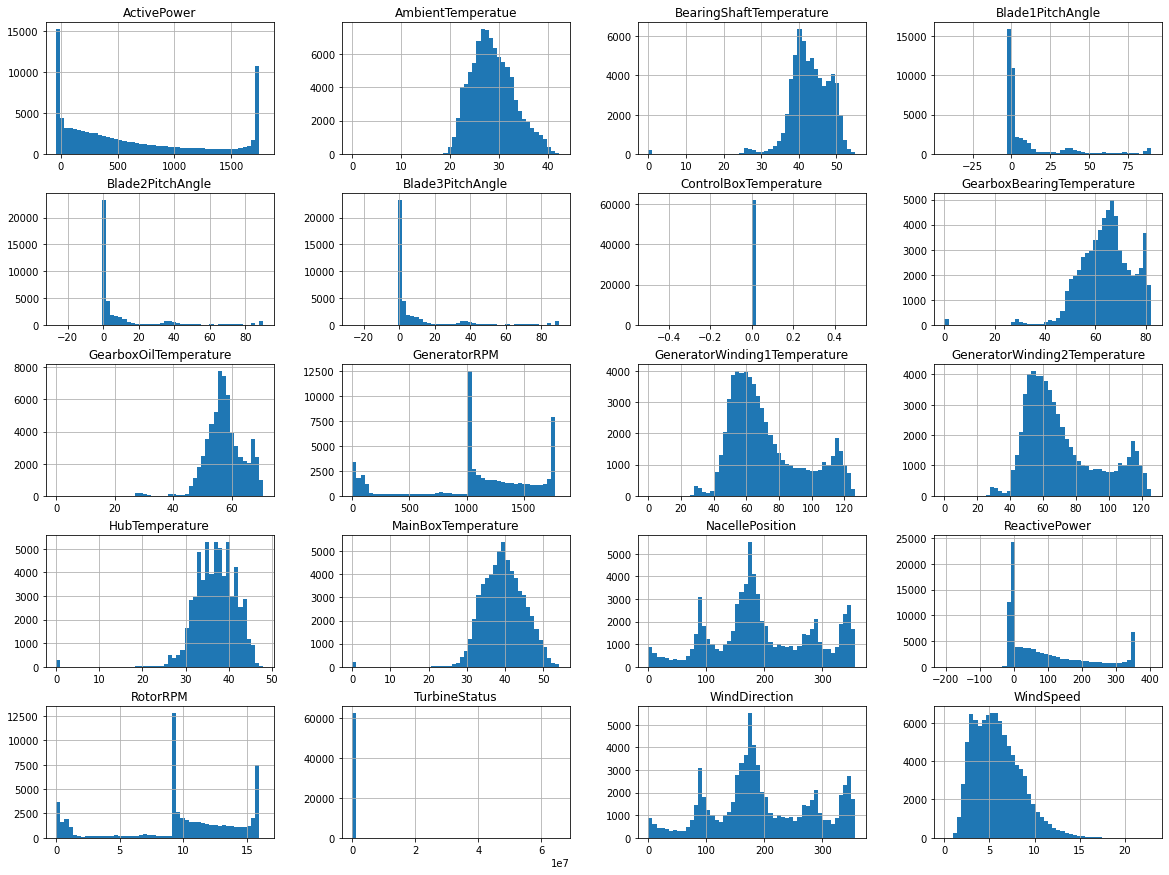

In [7]:
turbine_df.hist(bins=50, figsize=(20,15))
plt.show()

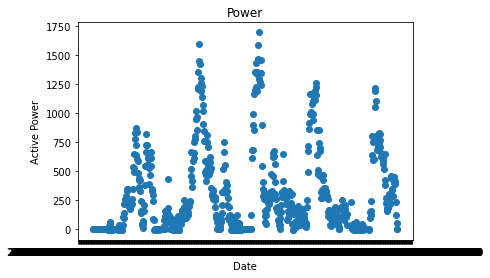

In [8]:
fig, ax = plt.subplots()
ax.scatter(turbine_df["Unnamed: 0"][:1000], turbine_df["ActivePower"][:1000])
ax.set_title("Power")
ax.set_ylabel("Active Power")
ax.set_xlabel('Date')
plt.show()

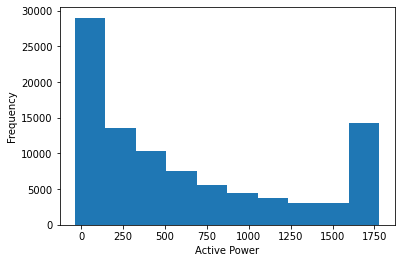

In [9]:
plt.hist(turbine_df.ActivePower)
plt.xlabel("Active Power")
plt.ylabel("Frequency")
plt.show()

## Parsing dates

In [10]:
turbine_df = pd.read_csv("./datasets/Turbine_Data.csv",
                 parse_dates=["Unnamed: 0"])

In [11]:
turbine_df.head()

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


## Changing Unnamed to DateTime

In [12]:
turbine_df['DateTime'] = turbine_df['Unnamed: 0'] 
turbine_df.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
turbine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype              
---  ------                        --------------   -----              
 0   ActivePower                   94750 non-null   float64            
 1   AmbientTemperatue             93817 non-null   float64            
 2   BearingShaftTemperature       62518 non-null   float64            
 3   Blade1PitchAngle              41996 non-null   float64            
 4   Blade2PitchAngle              41891 non-null   float64            
 5   Blade3PitchAngle              41891 non-null   float64            
 6   ControlBoxTemperature         62160 non-null   float64            
 7   GearboxBearingTemperature     62540 non-null   float64            
 8   GearboxOilTemperature         62438 non-null   float64            
 9   GeneratorRPM                  62295 non-null   float64            
 10  GeneratorWinding1Tem

## Adding DateTime parameters

In [14]:
turbine_df['DateTime'] = pd.to_datetime(turbine_df['DateTime'], 
 format = '%Y-%m-%dT%H:%M:%SZ', 
 errors = 'coerce')

turbine_df['year'] = turbine_df['DateTime'].dt.year
turbine_df['month'] = turbine_df['DateTime'].dt.month
turbine_df['day'] = turbine_df['DateTime'].dt.day
turbine_df['hour'] = turbine_df['DateTime'].dt.hour
turbine_df['minute'] = turbine_df['DateTime'].dt.minute

In [15]:
# Drop original DateTime column
turbine_df.drop('DateTime', axis=1, inplace= True)

## Missing Values

In [16]:
turbine_df.isna().sum()

ActivePower                     23474
AmbientTemperatue               24407
BearingShaftTemperature         55706
Blade1PitchAngle                76228
Blade2PitchAngle                76333
Blade3PitchAngle                76333
ControlBoxTemperature           56064
GearboxBearingTemperature       55684
GearboxOilTemperature           55786
GeneratorRPM                    55929
GeneratorWinding1Temperature    55797
GeneratorWinding2Temperature    55775
HubTemperature                  55818
MainBoxTemperature              55717
NacellePosition                 45946
ReactivePower                   23476
RotorRPM                        56097
TurbineStatus                   55316
WTG                                 0
WindDirection                   45946
WindSpeed                       23629
year                                0
month                               0
day                                 0
hour                                0
minute                              0
dtype: int64

In [17]:
#Percentage of the missing values among the columns
round(turbine_df.isna().sum()/len(turbine_df.index) * 100,2)

ActivePower                     19.86
AmbientTemperatue               20.64
BearingShaftTemperature         47.12
Blade1PitchAngle                64.48
Blade2PitchAngle                64.57
Blade3PitchAngle                64.57
ControlBoxTemperature           47.42
GearboxBearingTemperature       47.10
GearboxOilTemperature           47.19
GeneratorRPM                    47.31
GeneratorWinding1Temperature    47.20
GeneratorWinding2Temperature    47.18
HubTemperature                  47.21
MainBoxTemperature              47.13
NacellePosition                 38.86
ReactivePower                   19.86
RotorRPM                        47.45
TurbineStatus                   46.79
WTG                              0.00
WindDirection                   38.86
WindSpeed                       19.99
year                             0.00
month                            0.00
day                              0.00
hour                             0.00
minute                           0.00
dtype: float

## Filling the numeric rows with the median

In [18]:
for label, content in turbine_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Filling missing numeric values with median
            turbine_df[label] = content.fillna(content.median())

In [19]:
for label, content in list(turbine_df.items())[1:2]:
    print(pd.isnull(content).sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
118219    False
118220    False
118221    False
118222    False
118223    False
Name: AmbientTemperatue, Length: 118224, dtype: bool>


## Turn categorical variables into numbers

In [20]:
for label, content in turbine_df.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # We add the +1 because pandas encodes missing categories as -1
        turbine_df[label] = pd.Categorical(content).codes+1

In [21]:
turbine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118224 entries, 0 to 118223
Data columns (total 26 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ActivePower                   118224 non-null  float64
 1   AmbientTemperatue             118224 non-null  float64
 2   BearingShaftTemperature       118224 non-null  float64
 3   Blade1PitchAngle              118224 non-null  float64
 4   Blade2PitchAngle              118224 non-null  float64
 5   Blade3PitchAngle              118224 non-null  float64
 6   ControlBoxTemperature         118224 non-null  float64
 7   GearboxBearingTemperature     118224 non-null  float64
 8   GearboxOilTemperature         118224 non-null  float64
 9   GeneratorRPM                  118224 non-null  float64
 10  GeneratorWinding1Temperature  118224 non-null  float64
 11  GeneratorWinding2Temperature  118224 non-null  float64
 12  HubTemperature                118224 non-nul

## Train-Test Splitting

In [22]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(turbine_df, test_size=0.02, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 115859
Rows in test set: 2365


In [23]:
turbine_df = train_set.copy()

## Corelation matrix

In [24]:
corr_matrix = turbine_df.corr()
corr_matrix['ActivePower'].sort_values(ascending=False)

ActivePower                     1.000000
WindSpeed                       0.928686
GeneratorWinding2Temperature    0.748397
GeneratorWinding1Temperature    0.747728
ReactivePower                   0.726202
GeneratorRPM                    0.672296
RotorRPM                        0.671696
GearboxOilTemperature           0.651129
GearboxBearingTemperature       0.620349
BearingShaftTemperature         0.490685
HubTemperature                  0.262395
hour                            0.154609
MainBoxTemperature              0.081525
month                           0.044419
NacellePosition                 0.022395
WindDirection                   0.022395
year                            0.003040
minute                          0.002295
TurbineStatus                   0.000341
day                            -0.042667
AmbientTemperatue              -0.056497
Blade1PitchAngle               -0.189420
Blade3PitchAngle               -0.189638
Blade2PitchAngle               -0.189638
ControlBoxTemper

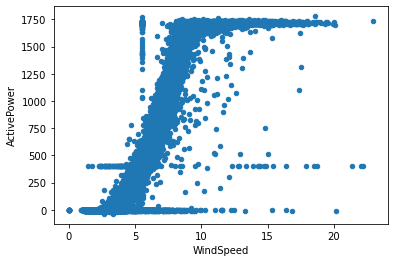

In [25]:
turbine_df.plot(kind="scatter", x="WindSpeed", y="ActivePower")
plt.show()

## Prepare the data to train the model

In [26]:
turbine_df = train_set.drop("ActivePower", axis=1)
turbine_labels = train_set["ActivePower"].copy()

## Selecting a desired model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(turbine_df, turbine_labels)

RandomForestRegressor()

## Evaluating the model

In [28]:
from sklearn.metrics import mean_squared_error
predictions = model.predict(turbine_df)
mse = mean_squared_error(turbine_labels, predictions)
rmse = np.sqrt(mse)

In [29]:
rmse

12.92788956736483

### Testing the model on Training Data

In [30]:
some_data = turbine_df.iloc[:20]
some_labels = turbine_labels.iloc[:20]

In [31]:
model.predict(some_data)

array([ 475.23667948,   74.56216902,  402.65489332, 1044.059874  ,
         -5.90825301, 1385.45565073,  339.06784004,   -6.29821899,
       1725.31314696,   -4.8295838 ,  210.83019018, 1070.56929463,
       1719.95282227,  402.65489332,  253.76618366,  624.02135578,
        402.65489332, 1396.23415849,  402.65489332, 1718.73198384])

In [32]:
np.array(some_labels)

array([ 477.142752  ,   73.54754435,  402.65489332, 1055.851445  ,
         -6.01979413, 1383.995073  ,  340.43673   ,   -5.87378341,
       1726.835925  ,   -4.82970736,  211.68833434, 1042.785391  ,
       1719.96231444,  402.65489332,  259.36252   ,  589.76134817,
        402.65489332, 1400.82291071,  402.65489332, 1717.18129811])

## Testing the model on test data

In [33]:
X_test = test_set.drop("ActivePower", axis=1)
Y_test = test_set["ActivePower"].copy()
final_predictions = model.predict(X_test)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

## Fuzzy Controller

In [34]:
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

N -> Negative
B -> Big
P -> Positive
Z -> Zero

c:\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


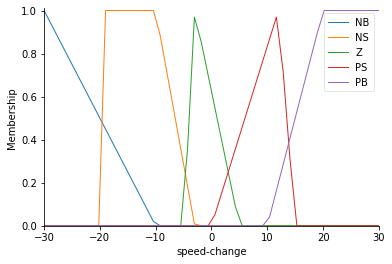

In [35]:
# Definig membership function for the change in rotational speed of generator

speed_change=ctrl.Antecedent(np.linspace(-30,30),'speed-change')
speed_change['NB']=fuzzy.trimf(speed_change.universe,[-30,-30,-10])
speed_change['NS']=fuzzy.trapmf(speed_change.universe,[-20,-20,-10,-3])
speed_change['Z']=fuzzy.trimf(speed_change.universe,[-5,-3,5])
speed_change['PS']=fuzzy.trimf(speed_change.universe,[0,12,15])
speed_change['PB']=fuzzy.trapmf(speed_change.universe,[10,20,30,30])
speed_change.view()
plt.show()

In [36]:
change_active_power = (model.predict(some_data) - model.predict(some_data).mean())/100
#               (Considering this as initial active power)  - (Final)

In [37]:
np.sort(change_active_power)

array([-6.87867462, -6.87477496, -6.86398827, -6.07007074, -4.70739053,
       -4.2780306 , -3.42501403, -2.7891435 , -2.7891435 , -2.7891435 ,
       -2.7891435 , -2.06332564, -0.57547888,  3.62490631,  3.89000051,
        7.03886407,  7.14664915, 10.37162741, 10.38383579, 10.43743904])

c:\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


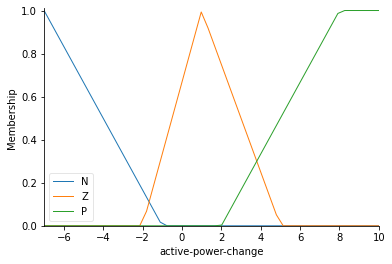

In [38]:
# Definig membership function for the active power
active_power_change=ctrl.Antecedent(np.linspace(-7,10),'active-power-change')
active_power_change['N']=fuzzy.trimf(active_power_change.universe,[-7,-7,-1])
active_power_change['Z']=fuzzy.trimf(active_power_change.universe,[-2,1,5])
active_power_change['P']=fuzzy.trapmf(active_power_change.universe,[2,8,10,10])
active_power_change.view()
plt.show()

c:\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


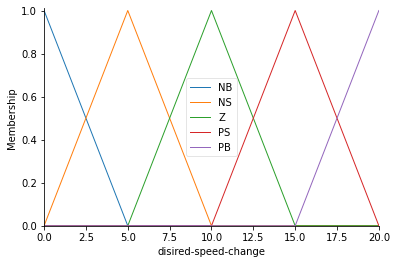

In [39]:
disired_speed_change=ctrl.Consequent(np.arange(0,21),'disired-speed-change')
names = ['NB', 'NS', 'Z', 'PS', 'PB']
disired_speed_change.automf(5,names=names)
disired_speed_change.view()

In [40]:
# Defing the rules
rule1=ctrl.Rule(antecedent = ((speed_change['NB'] & active_power_change['N']) |
                (speed_change['PB'] & active_power_change['P'])),
                consequent = disired_speed_change['PB'])


rule2=ctrl.Rule(antecedent = ((speed_change['NS'] & active_power_change['N']) |
                (speed_change['PS'] & active_power_change['P'])),
                consequent = disired_speed_change['PS'])


rule3=ctrl.Rule(antecedent = ((speed_change['Z'] & active_power_change['P']) |
                (speed_change['Z'] & active_power_change['Z']) |
                (speed_change['Z'] & active_power_change['N'])),
                consequent = disired_speed_change['Z'])


rule4=ctrl.Rule(antecedent = ((speed_change['NB'] & active_power_change['P'])|
                (speed_change['PB'] & active_power_change['N']))
                ,consequent = disired_speed_change['NB'])


c:\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\python37\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


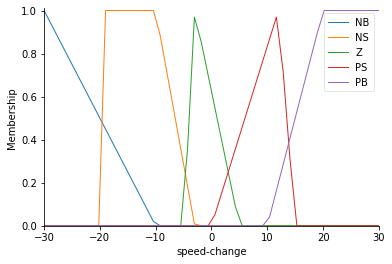

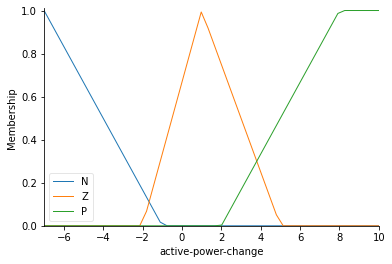

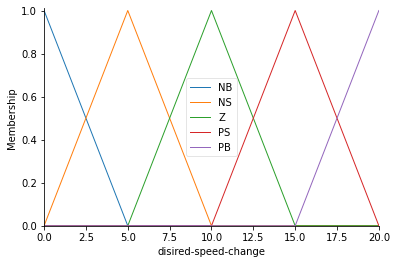

In [41]:
rule=[rule1,rule2,rule3,rule4]
system=ctrl.ControlSystem(rule)
y=ctrl.ControlSystemSimulation(system)

speed_change.view()
active_power_change.view()
disired_speed_change.view(sim=y)
plt.show()

In [42]:
y.input['speed-change'] = 5
y.input['active-power-change'] = 8
y.compute()
print(y.output)

OrderedDict([('disired-speed-change', 14.586398145323434)])
